In [39]:
%run gyenes_hobot_hazi.py

In [2]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

## Importáljuk az adatot

In [3]:
df_node = pd.read_csv('soc-pokec-relationships.txt', 
                                 header=None, sep='\t', quotechar='"')

In [4]:
df_attr=pd.read_csv('soc-pokec-profiles.txt.gz', compression='gzip', 
                                 header=None, sep='\t', quotechar='"')

## Gráf építése

In [6]:
df=minta(df_node, df_attr)

In [7]:
node_attributes=df

In [8]:
G=nx.from_pandas_edgelist(node_attributes, "node_1", 'node_2')

In [9]:
node_attributes=node_attributes.set_index("node_1").drop_duplicates()

In [10]:
for node,data in G.nodes(data=True):
    try:
        data['gender_1'] = node_attributes.loc[node].iloc[0]["gender_1"]
    except:
        pass

In [11]:
for node,data in G.nodes(data=True):
    try:
        data['age_1'] = node_attributes.loc[node].iloc[0]["age_1"]
    except:
        pass

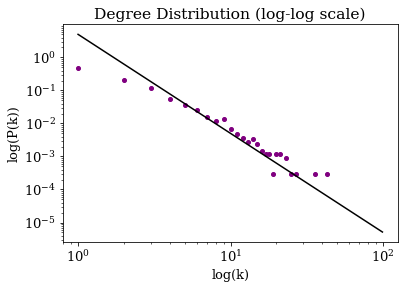

In [44]:
k_distrib(G, fit_line=True, expct_lo=1, expct_hi=100, expct_const=5)

Az ábrán jól látszik, hogy a fokszám eloszlás hatványtörvényt követ. Ez a skálafüggetlen gráfok jellemzője.

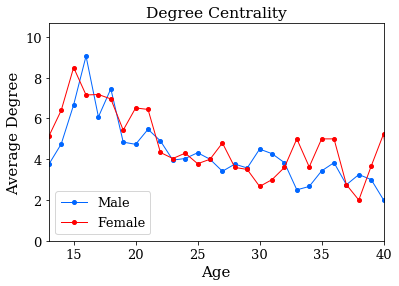

In [32]:
age_degree(G)

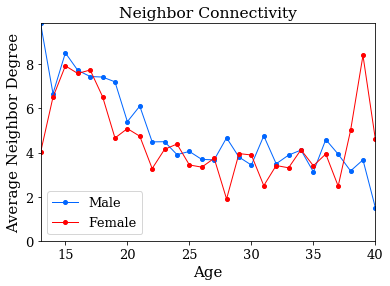

In [38]:
age_connect(G)

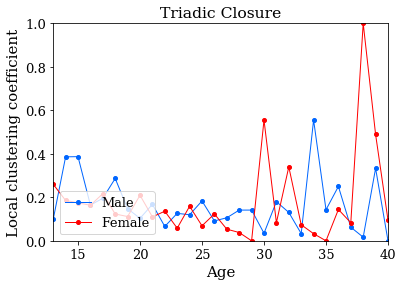

In [40]:
age_clustering(G)

## Prediktáljuk az átlagot

In [45]:
pred=mean_predict(df)

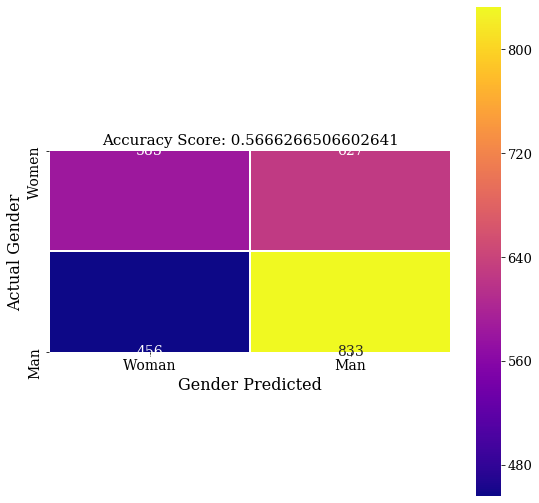

In [46]:
import seaborn as sns
from sklearn import  metrics
from sklearn import linear_model, model_selection
logistic = linear_model.LogisticRegression()

cm = metrics.confusion_matrix(pred["gender_1"],pred["predict"])

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'plasma', annot_kws={"fontsize":14});
plt.yticks([0.5,1.5], labels=["Women", "Man"], fontsize=14)
plt.ylabel('Actual Gender', fontsize=16);
plt.xticks([0.5,1.5], labels=["Woman", "Man"], fontsize=14)
plt.xlabel('Gender Predicted', fontsize=16);

plt.title(f'Accuracy Score: {len(pred[pred["gender_1"]==pred["predict"]])/len(pred)}', size = 15);

Az átlaggal való prediktálás közel 50 százalékos értéket adott

## Attributumok alapján prediktálás

In [47]:
data, target = log_predict_data_target(df_attr)

In [48]:
from sklearn import linear_model, model_selection
from sklearn.model_selection import train_test_split


data_train, data_test, target_train, target_test = model_selection.train_test_split(
    data, target, test_size=0.25, random_state=0)
len(data_train),len(data_test)

(1224480, 408160)

In [49]:
#initialize the model
from sklearn import linear_model, model_selection, metrics
logistic = linear_model.LogisticRegression()

# fit the model
logistic.fit(data_train,target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
print(f'LogisticRegression accuracy score: {logistic.score(data_test, target_test):.3f}')

LogisticRegression accuracy score: 0.671


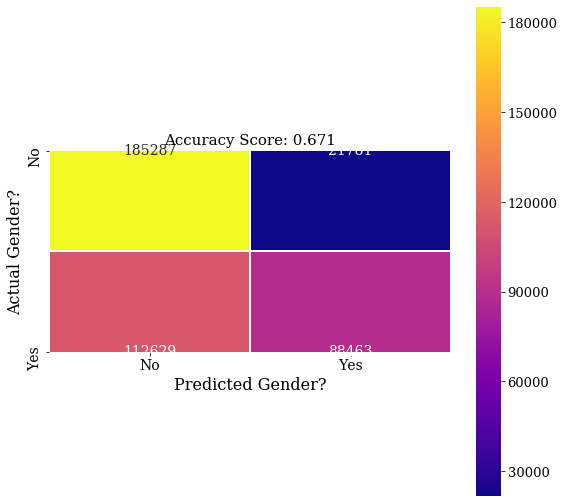

In [51]:
import seaborn as sns
predictions = logistic.predict(data_test)
cm = metrics.confusion_matrix(target_test,predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'plasma', annot_kws={"fontsize":14});
plt.yticks([0.5,1.5], labels=["No", "Yes"], fontsize=14)
plt.ylabel('Actual Gender?', fontsize=16);
plt.xticks([0.5,1.5], labels=["No", "Yes"], fontsize=14)
plt.xlabel('Predicted Gender?', fontsize=16);
plt.title(f'Accuracy Score: {logistic.score(data_test, target_test):.3f}', size = 15);